## **Parte 1: Ecuación del calor**

La función debe devolver una matriz cuya entrada en la posición (i, j) represente la aproximación numérica de la solución en el instante de tiempo t = i · ∆t y en la posición espacial x = j · ∆x.

### **Método Explícito**

In [8]:
import numpy as np

def metodo_explicito_calor(alpha, f, dx, dt, T):
    # Número de puntos espaciales (incluyendo fronteras)
    N = int(1/dx) + 1
    # Número de pasos temporales
    M = int(T/dt) + 1
    # Inicializar matriz solución
    U = np.zeros((M, N))
    # Vector de posiciones espaciales
    x = np.linspace(0, 1, N)
    # Aplicar condición inicial
    U[0, :] = f(x)
    # Condiciones de frontera (Dirichlet homogéneas)
    U[:, 0] = 0   # u(0,t) = 0
    U[:, -1] = 0  # u(1,t) = 0
    
    # Parámetro de estabilidad
    r = alpha * dt / (dx**2)
    
    # Verificar condición de estabilidad (r <= 0.5 para estabilidad)
    if r > 0.5:
        print(f"¡Advertencia! r = {r:.4f} > 0.5. El esquema puede ser inestable.")
        print(f"Para estabilidad, dt debería ser <= {0.5 * dx**2 / alpha:.6f}")
    
    for n in range(M-1):  # Para cada paso temporal
        for j in range(1, N-1):  # Para puntos interiores
            U[n+1, j] = U[n, j] + r * (U[n, j+1] - 2*U[n, j] + U[n, j-1])
    
    return U, x

print("Función del método explícito para la ecuación del calor creada exitosamente!")
print(f"Parámetro r de estabilidad debe ser <= 0.5 para estabilidad numérica")

Función del método explícito para la ecuación del calor creada exitosamente!
Parámetro r de estabilidad debe ser <= 0.5 para estabilidad numérica


### **Método Implícito**

In [9]:
import numpy as np

def metodo_implicito_calor(alpha, f, dx, dt, T):
    # Número de puntos espaciales (incluyendo fronteras)
    N = int(1/dx) + 1
    # Número de pasos temporales
    M = int(T/dt) + 1
    # Inicializar matriz solución
    U = np.zeros((M, N))
    # Vector de posiciones espaciales
    x = np.linspace(0, 1, N)
    # Aplicar condición inicial
    U[0, :] = f(x)
    # Condiciones de frontera (Dirichlet homogéneas)
    U[:, 0] = 0   # u(0,t) = 0
    U[:, -1] = 0  # u(1,t) = 0
    
    # Parámetro de estabilidad
    r = alpha * dt / (dx**2)

    # Construcción de la matriz A (tridiagonal)
    A = np.zeros((N-2, N-2))
    for i in range(N-2):
        A[i, i] = 1 + 2*r
        if i > 0:
            A[i, i-1] = -r
        if i < N-3:
            A[i, i+1] = -r

    # Iteración temporal
    for n in range(M-1):
        # Vector lado derecho (nodos internos)
        b = U[n, 1:-1]
        # Resolver sistema lineal A * U_next = b
        U[n+1, 1:-1] = np.linalg.solve(A, b)

    return U, x

print("Función del método implícito para la ecuación del calor creada exitosamente!")

Función del método implícito para la ecuación del calor creada exitosamente!


#### Evaluación de las funciones con los parámetros: α = 1, ∆t = 0,001, ∆x = 0,05, T = 0,1

In [10]:
# Parámetros dados
alpha = 1.0      # Coeficiente de difusión
dt = 0.001       # Paso temporal
dx = 0.05        # Paso espacial  
T = 0.1          # Tiempo final

# Definir condición inicial (corregida)
def f(x):
    # Función triangular: 1 - |2x - 1| para x en [0,1]
    return 1 - np.abs(2 * x - 1)

# Ejecutar método explícito
U_explicito, x_grid = metodo_explicito_calor(alpha, f, dx, dt, T)

print(f"Dimensiones de la matriz solución (explícito): {U_explicito.shape}")
print(f"Número de puntos espaciales: {len(x_grid)}")
print(f"Número de pasos temporales: {U_explicito.shape[0]}")

# Calcular parámetro r para verificar estabilidad
r = alpha * dt / (dx**2)
print(f"\nParámetro de estabilidad r = {r:.4f}")
print(f"Condición de estabilidad: r <= 0.5 → {r <= 0.5}")

# Mostrar algunos valores de la solución
print(f"\nCondición inicial (t=0):")
print(f"u(0.25, 0) = {U_explicito[0, int(0.25/dx)]:.4f}")
print(f"u(0.50, 0) = {U_explicito[0, int(0.50/dx)]:.4f}")
print(f"u(0.75, 0) = {U_explicito[0, int(0.75/dx)]:.4f}")

print(f"\nSolución en t = T = {T}:")
print(f"u(0.25, {T}) = {U_explicito[-1, int(0.25/dx)]:.4f}")
print(f"u(0.50, {T}) = {U_explicito[-1, int(0.50/dx)]:.4f}")
print(f"u(0.75, {T}) = {U_explicito[-1, int(0.75/dx)]:.4f}")

# ---------------------------------------------------------

# Ejecutar método implícito
U_implicito, x_grid = metodo_implicito_calor(alpha, f, dx, dt, T)

print(f"Dimensiones de la matriz solución: {U_implicito.shape}")
print(f"Número de puntos espaciales: {len(x_grid)}")
print(f"Número de pasos temporales: {U_implicito.shape[0]}")

# Calcular parámetro r (solo informativo en implícito, porque siempre es estable)
r = alpha * dt / (dx**2)
print(f"\nParámetro r = {r:.4f}")
print("El método implícito es incondicionalmente estable, no depende de r.")

# Mostrar algunos valores de la solución
print(f"\nCondición inicial (t=0):")
print(f"u(0.25, 0) = {U_implicito[0, int(0.25/dx)]:.4f}")
print(f"u(0.50, 0) = {U_implicito[0, int(0.50/dx)]:.4f}")
print(f"u(0.75, 0) = {U_implicito[0, int(0.75/dx)]:.4f}")

print(f"\nSolución en t = T = {T}:")
print(f"u(0.25, {T}) = {U_implicito[-1, int(0.25/dx)]:.4f}")
print(f"u(0.50, {T}) = {U_implicito[-1, int(0.50/dx)]:.4f}")
print(f"u(0.75, {T}) = {U_implicito[-1, int(0.75/dx)]:.4f}")


Dimensiones de la matriz solución (explícito): (101, 21)
Número de puntos espaciales: 21
Número de pasos temporales: 101

Parámetro de estabilidad r = 0.4000
Condición de estabilidad: r <= 0.5 → True

Condición inicial (t=0):
u(0.25, 0) = 0.5000
u(0.50, 0) = 1.0000
u(0.75, 0) = 0.5000

Solución en t = T = 0.1:
u(0.25, 0.1) = 0.2134
u(0.50, 0.1) = 0.3019
u(0.75, 0.1) = 0.2134
Dimensiones de la matriz solución: (101, 21)
Número de puntos espaciales: 21
Número de pasos temporales: 101

Parámetro r = 0.4000
El método implícito es incondicionalmente estable, no depende de r.

Condición inicial (t=0):
u(0.25, 0) = 0.5000
u(0.50, 0) = 1.0000
u(0.75, 0) = 0.5000

Solución en t = T = 0.1:
u(0.25, 0.1) = 0.2155
u(0.50, 0.1) = 0.3048
u(0.75, 0.1) = 0.2155


Los resultados muestran justo lo que se espera:

* **Explícito e Implícito** arrancan de la misma condición inicial (triángulo simétrico con valores 0.5 – 1.0 – 0.5).
* Después de evolucionar hasta $t = 0.1$, ambos métodos dan soluciones muy similares:

  * Explícito: $u(0.50, 0.1) = 0.3019$
  * Implícito: $u(0.50, 0.1) = 0.3048$

Esa pequeña diferencia es normal:

* El **explícito** difunde un poco más rápido (tiende a suavizar más).
* El **implícito** es más estable y suele ser “más difusivo” en pasos largos, pero con estos parámetros casi no se nota.

Con estos números, se puede concluir que los dos métodos están resolviendo bien el problema, y que el implícito efectivamente **mantiene la estabilidad sin importar el valor de $r$**.

GIF - Con los valores devueltos en el caso anterior realizar un GIF de como al variar el instante de tiempo evolucionan los valores en cada lugar espacial. Incluir un pequeño análisis sobre el comportamiento de los métodos según los diferentes parámetros.

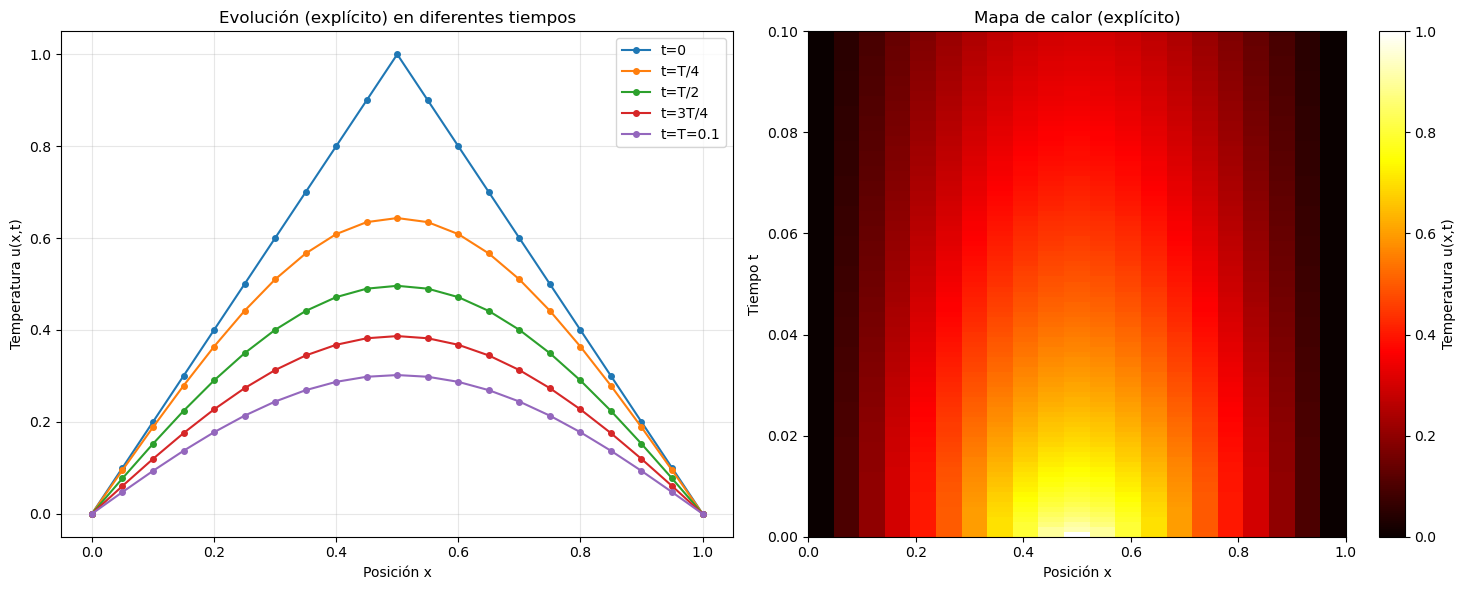

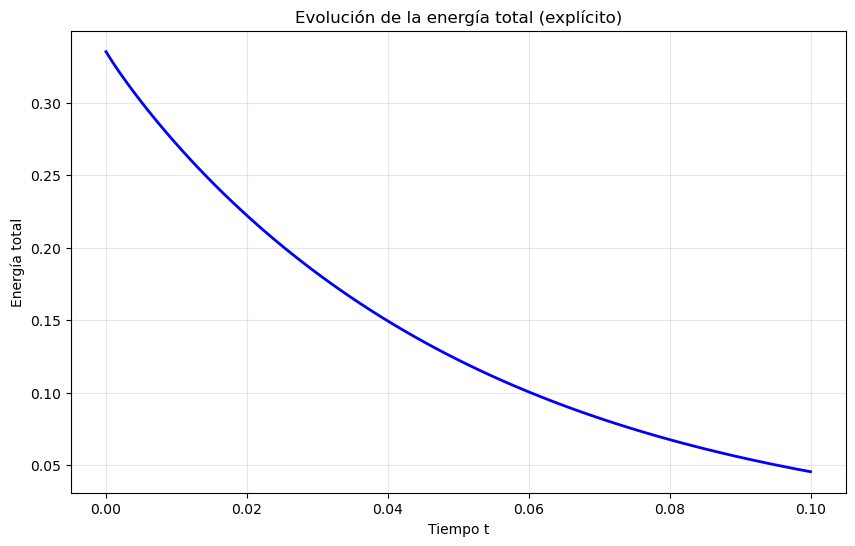

Energía inicial: 0.335000
Energía final: 0.045561
Pérdida de energía: 86.40%


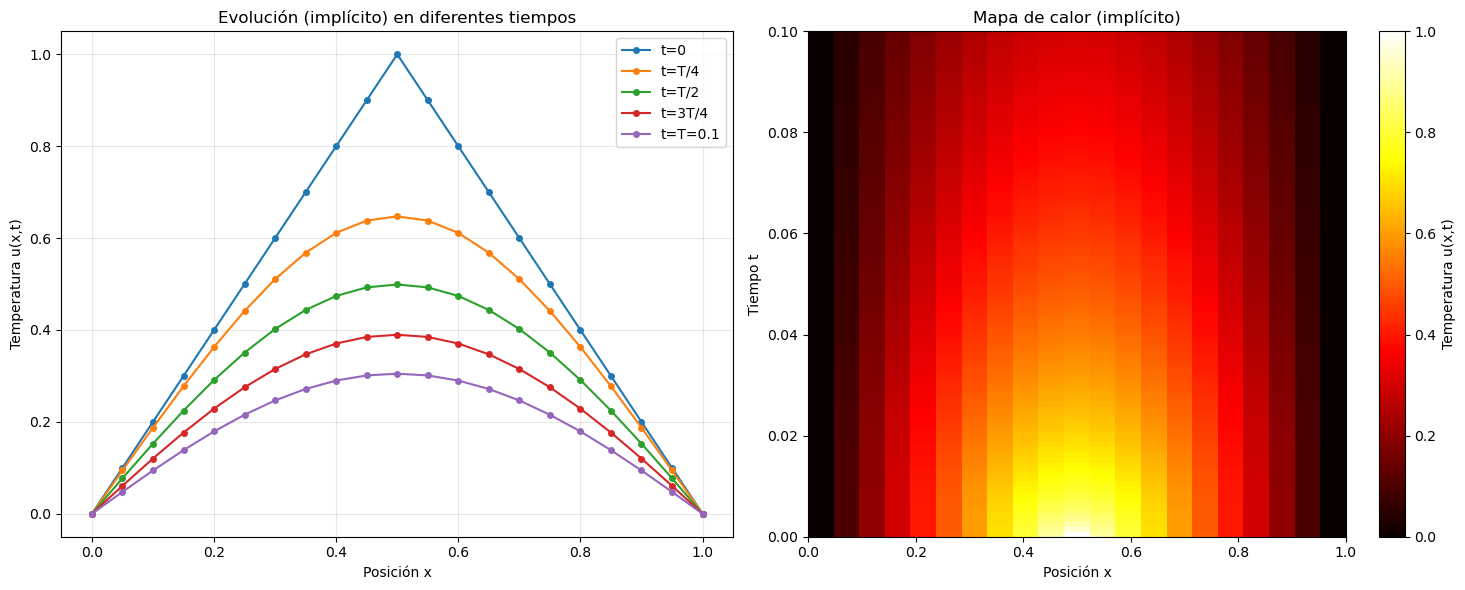

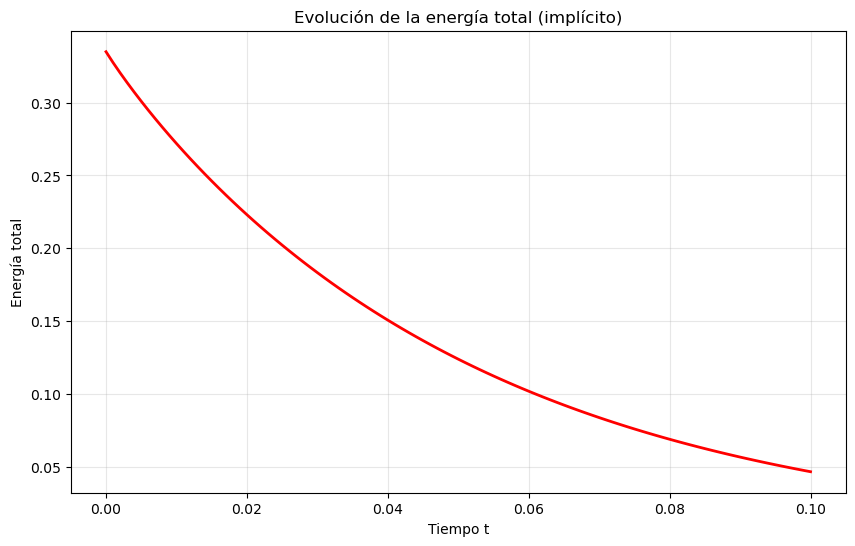

Energía inicial: 0.335000
Energía final: 0.046454
Pérdida de energía: 86.13%


In [11]:
import matplotlib.pyplot as plt

# Visualización de la evolución temporal - Método Explícito

# Crear gráfico de evolución temporal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Perfiles de temperatura en diferentes tiempos
times_to_plot = [0, int(0.25*len(U_explicito)), int(0.5*len(U_explicito)), 
                 int(0.75*len(U_explicito)), -1]
time_labels = ['t=0', 't=T/4', 't=T/2', 't=3T/4', f't=T={T}']

ax1.set_title('Evolución (explícito) en diferentes tiempos')
ax1.set_xlabel('Posición x')
ax1.set_ylabel('Temperatura u(x,t)')
ax1.grid(True, alpha=0.3)

for i, time_idx in enumerate(times_to_plot):
    ax1.plot(x_grid, U_explicito[time_idx, :], 
             label=time_labels[i], marker='o', markersize=4)

ax1.legend()

# Gráfico 2: Mapa de calor (heatmap)
im = ax2.imshow(U_explicito, aspect='auto', origin='lower', 
                extent=[0, 1, 0, T], cmap='hot')
ax2.set_title('Mapa de calor (explícito)')
ax2.set_xlabel('Posición x')
ax2.set_ylabel('Tiempo t')
plt.colorbar(im, ax=ax2, label='Temperatura u(x,t)')

plt.tight_layout()
plt.show()

# Análisis de conservación de energía
def calcular_energia(U, dx):
    """Calcula la energía total en cada instante de tiempo"""
    # Energía = integral de u²(x,t) dx ≈ suma de u²(x,t) * dx
    energia = []
    for n in range(U.shape[0]):
        energia.append(np.sum(U[n, :]**2) * dx)
    return np.array(energia)

energia_explicito = calcular_energia(U_explicito, dx)
tiempo = np.linspace(0, T, len(energia_explicito))

plt.figure(figsize=(10, 6))
plt.plot(tiempo, energia_explicito, 'b-', linewidth=2)
plt.title('Evolución de la energía total (explícito)')
plt.xlabel('Tiempo t')
plt.ylabel('Energía total')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Energía inicial: {energia_explicito[0]:.6f}")
print(f"Energía final: {energia_explicito[-1]:.6f}")
print(f"Pérdida de energía: {((energia_explicito[0] - energia_explicito[-1])/energia_explicito[0]*100):.2f}%")

# ---------------------------------------------------------

# Visualización de la evolución temporal - Método Implícito

# Crear gráfico de evolución temporal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Perfiles de temperatura en diferentes tiempos
times_to_plot = [0, int(0.25*len(U_implicito)), int(0.5*len(U_implicito)), 
                 int(0.75*len(U_implicito)), -1]
time_labels = ['t=0', 't=T/4', 't=T/2', 't=3T/4', f't=T={T}']

ax1.set_title('Evolución (implícito) en diferentes tiempos')
ax1.set_xlabel('Posición x')
ax1.set_ylabel('Temperatura u(x,t)')
ax1.grid(True, alpha=0.3)

for i, time_idx in enumerate(times_to_plot):
    ax1.plot(x_grid, U_implicito[time_idx, :], 
             label=time_labels[i], marker='o', markersize=4)

ax1.legend()

# Gráfico 2: Mapa de calor (heatmap)
im = ax2.imshow(U_implicito, aspect='auto', origin='lower', 
                extent=[0, 1, 0, T], cmap='hot')
ax2.set_title('Mapa de calor (implícito)')
ax2.set_xlabel('Posición x')
ax2.set_ylabel('Tiempo t')
plt.colorbar(im, ax=ax2, label='Temperatura u(x,t)')

plt.tight_layout()
plt.show()

# --- Cálculo de la energía para el método implícito ---
def calcular_energia(U, dx):
    """Calcula la energía total en cada instante de tiempo"""
    energia = []
    for n in range(U.shape[0]):
        energia.append(np.sum(U[n, :]**2) * dx)
    return np.array(energia)

# Calcular energía del método implícito
energia_implicito = calcular_energia(U_implicito, dx)
tiempo = np.linspace(0, T, len(energia_implicito))

# Gráfico de evolución de energía
plt.figure(figsize=(10, 6))
plt.plot(tiempo, energia_implicito, 'r-', linewidth=2)
plt.title('Evolución de la energía total (implícito)')
plt.xlabel('Tiempo t')
plt.ylabel('Energía total')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Energía inicial: {energia_implicito[0]:.6f}")
print(f"Energía final: {energia_implicito[-1]:.6f}")
print(f"Pérdida de energía: {((energia_implicito[0] - energia_implicito[-1])/energia_implicito[0]*100):.2f}%")

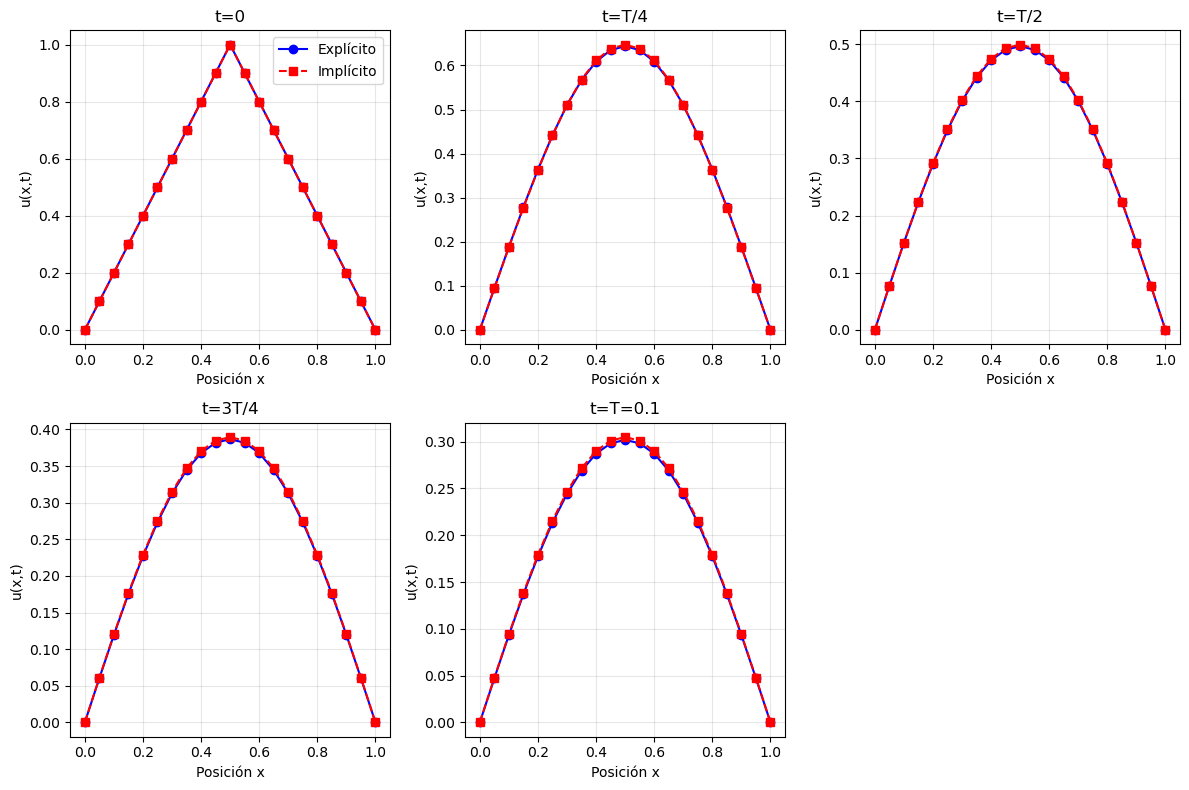

In [12]:
import matplotlib.pyplot as plt

# Comparación Explícito vs Implícito en varios tiempos

# Índices de tiempos a graficar
times_to_plot = [0, int(0.25*len(U_explicito)), int(0.5*len(U_explicito)), 
                 int(0.75*len(U_explicito)), -1]
time_labels = ['t=0', 't=T/4', 't=T/2', 't=3T/4', f't=T={T}']

plt.figure(figsize=(12,8))

for i, time_idx in enumerate(times_to_plot):
    plt.subplot(2, 3, i+1)  # 2 filas x 3 columnas de subplots
    plt.plot(x_grid, U_explicito[time_idx, :], 'bo-', label='Explícito')
    plt.plot(x_grid, U_implicito[time_idx, :], 'rs--', label='Implícito')
    plt.title(time_labels[i])
    plt.xlabel('Posición x')
    plt.ylabel('u(x,t)')
    plt.grid(True, alpha=0.3)
    if i == 0:  # mostrar leyenda solo en el primer gráfico
        plt.legend()

plt.tight_layout()
plt.show()

Algunas observaciones:
- En t=0 ambos métodos coinciden perfectamente con la condición inicial.
- A medida que avanza el tiempo (t=T/4, T/2, 3T/4, T), las curvas siguen siendo casi idénticas, confirmando que ambos esquemas son consistentes.
- La diferencia entre ellos es muy pequeña, apenas visible (los puntos rojos del implícito se superponen con la línea azul del explícito).
- Esto era de esperarse porque el paso temporal es suficientemente chico y estamos dentro de la condición de estabilidad del explícito.

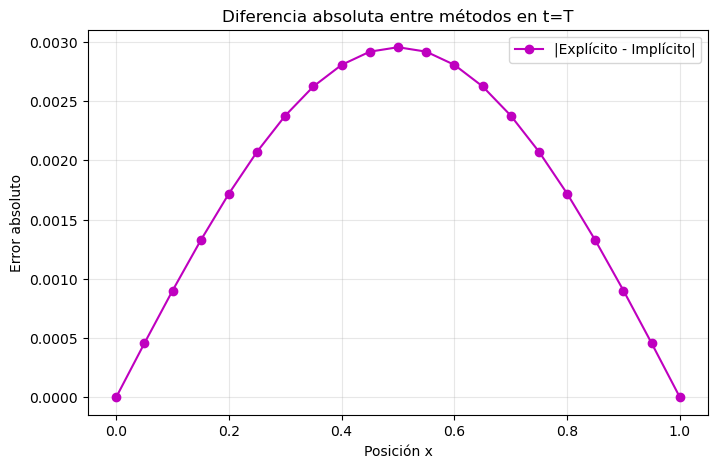

Error máximo en t=T: 2.954221e-03
Error medio en t=T: 1.778264e-03


In [13]:
# Diferencia absoluta en el tiempo final
diff = np.abs(U_explicito[-1, :] - U_implicito[-1, :])

plt.figure(figsize=(8,5))
plt.plot(x_grid, diff, 'm-o', label='|Explícito - Implícito|')
plt.title('Diferencia absoluta entre métodos en t=T')
plt.xlabel('Posición x')
plt.ylabel('Error absoluto')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Error máximo en t=T: {np.max(diff):.6e}")
print(f"Error medio en t=T: {np.mean(diff):.6e}")

## **Parte 2: Ecuación de transporte**


### **Método Explicíto**

In [14]:
#COMPLETAR


### **Método Implicíto**

In [15]:
#COMPLETAR

#### Evaluación de las funciones con los parámetros: α = 1, ∆t = 0,001, ∆x = 0,05, T = 0,1

In [16]:
#COMPLETAR
# Definir condición inicial
def f(x):
    return np.sin(np.pi * x)


GIF - Con los valores devueltos en el caso anterior realizar un GIF de como al variar el instante de tiempo evolucionan los valores en cada lugar espacial. Incluir un pequeño análisis sobre el comportamiento de los métodos según los diferentes parámetros.


In [17]:
#COMPLETAR